### **This project aims to use the sqlite3 python module to analyze Youtube data.**
#### The data represents ~2000 youtube videos and 10 comments from each. The videos dataset and comments dataset will be housed in two separate SQL tables, linked by a VideoID primary key.
#### A few queries will be written to answer questions about the data.

In [110]:
import sqlite3
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

# create youtube database
Path('youtube.db').touch()

# build database cursor
con = sqlite3.connect('youtube.db')
c = con.cursor()

In [111]:
# create videostats table
c.execute('''CREATE TABLE IF NOT EXISTS videostats (
                Title TEXT, 
                VideoID VARCHAR(11) PRIMARY KEY,
                Published_At DATETIME,
                Keyword TEXT,
                Likes INT,
                Comments INT,
                Views INT)
                ''')

In [112]:
# create comments table
c.execute('''CREATE TABLE IF NOT EXISTS comments (
               VideoID VARCHAR(11) REFERENCES videostats (VideoID),
               Comment text,
               Likes int,
               Sentiment int)
               ''')

In [113]:
# import video_stats.csv file and ensure column order and name matches table columns
videostats = pd.read_csv('videos-stats.csv')
videostats = videostats[['Title',
                         'Video ID',
                         'Published At',
                         'Keyword',
                         'Likes',
                         'Comments',
                         'Views']]
videostats.rename(columns={'Video ID': 'VideoID', 'Published At': 'Published_At'}, inplace=True)

# drop duplicates to ensure unique VideoID primary key and remove columns with NaN entries
videostats.drop_duplicates(subset='VideoID', keep='first', inplace=True)
videostats.dropna(axis=0, how='any', inplace=True)

# append videostats df to videostats table in youtube.db
videostats.to_sql('videostats', con, if_exists='append', index=False)

1867

In [114]:
# import comments.csv file and ensure column order and name matches table columns
comments = pd.read_csv('comments.csv')
comments = comments[['Video ID',
                     'Comment',
                     'Likes',
                     'Sentiment']]
comments.rename(columns={'Video ID': 'VideoID'}, inplace=True)

# append comments df to comments table in youtube.db
comments.to_sql('comments', con, if_exists='append', index=False)

18409

#### View entire **videostats** table as dataframe

In [115]:
pd.read_sql('''SELECT * FROM videostats''', con)

,Title,VideoID,Published_At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644
...,...,...,...,...,...,...,...
1862,Live Day 1- Introduction To Machine Learning A...,4UJelID_ICw,2022-02-01,machine learning,1861,184,37959
1863,Complete Roadmap for Machine Learning | ML Roa...,T4MLrtOKPjY,2021-05-11,machine learning,9615,648,319957
1864,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259,416,386360
1865,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981,72,431421


#### View entire **comments** table as dataframe

In [116]:
pd.read_sql('''SELECT * FROM comments''', con)

,VideoID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2
...,...,...,...,...
18404,cyLWtMSry58,I really like the point about engineering tool...,0,2
18405,cyLWtMSry58,I’ve just started exploring this field. And th...,20,2
18406,cyLWtMSry58,Excelente video con una pregunta filosófica pr...,1,1
18407,cyLWtMSry58,"Hey Daniel, just discovered your channel a cou...",35,2


#### What are the top 10 most commented-upon videos?

In [117]:
pd.read_sql('''SELECT VideoID, Title, Comments, Views 
                FROM videostats
                ORDER BY Comments DESC 
                LIMIT 10''', con)

,VideoID,Title,Comments,Views
0,FzG4uDgje3M,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,732818,4034122271
1,dg2Ag3e8W-Q,I Opened A Restaurant That Pays You To Eat At It,728774,116842899
2,0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",611757,285526909
3,yjmp8CoZBIo,One Direction - History (Official Video),434688,434352213
4,xuCn8ux2gbs,"history of the entire world, i guess",395657,147339243
5,gCYcHz2k5x0,Martin Garrix - Animals (Official Video),335455,1582262997
6,Ct6BUPvE2sM,PIKOTARO - PPAP (Pen Pineapple Apple Pen) (Lon...,294428,425478119
7,XXYlFuWEuKI,The Weeknd - Save Your Tears (Official Music V...,270948,915457091
8,9bqk6ZUsKyA,I Spent 50 Hours Buried Alive,239172,191988678
9,2isYuQZMbdU,"I Gave My 100,000,000th Subscriber An Island",224423,63310479


#### Which video has the most likes?

In [124]:
pd.read_sql('''SELECT VideoID, Title, MAX(Likes)
                FROM videostats''', con)

,VideoID,Title,MAX(Likes)
0,FzG4uDgje3M,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,16445558


#### What are the top 10 Keyword categories in total comments?

In [119]:
pd.read_sql('''SELECT Keyword, SUM(Comments) as Total_Comments
                FROM videostats 
                GROUP BY Keyword 
                ORDER BY Total_Comments DESC 
                LIMIT 10''', con)

,Keyword,Total_Comments
0,mrbeast,4797224
1,google,1019079
2,history,1009328
3,animals,831129
4,bed,667962
5,music,565291
6,marvel,485034
7,tutorial,396770
8,cnn,378737
9,apple,361992


#### What are the top 10 Keyword categories in total likes?

In [120]:
pd.read_sql('''SELECT Keyword, SUM(Likes) as Total_Likes
                FROM videostats 
                GROUP BY Keyword 
                ORDER BY Total_Likes DESC 
                LIMIT 10''', con)

,Keyword,Total_Likes
0,mrbeast,105295718
1,animals,28909480
2,google,21202537
3,bed,20842016
4,cubes,14813301
5,music,14452653
6,history,13667987
7,marvel,10518960
8,tutorial,8386044
9,how-to,7627111


#### What are the top 10 videos in likes to views ratio?

In [121]:
pd.read_sql('''SELECT VideoID, Title, Likes, Views, ROUND(Likes * 100.0 / Views, 1) AS Like_Perct
                FROM videostats 
                WHERE VIEWS > 1000000
                ORDER BY Like_Perct DESC
                LIMIT 10''', con)

,VideoID,Title,Likes,Views,Like_Perct
0,-EDUPj7Vg7o,NO MORE A FAMILY FRIENDLY VLOGGER | LAKSHAY CH...,196898,1223879,16.1
1,RFMi3v0TXP8,BLACKPINK - ‘Pink Venom’ DANCE PRACTICE VIDEO,3001232,23836066,12.6
2,3qhIuV7Y4iY,Boycott Urfi Javed &amp; Cringe Instagram Reel...,193217,1765945,10.9
3,J9lj3xdQoAk,Ep : 25 | Worlds Biggest Edtech Channel | Khan...,216891,2018720,10.7
4,axyNCiXeym8,TRICK To Solve Rubik Cube In Just 10 Seconds!!,634419,6170029,10.3
5,nc9iZp-1seQ,Trolling Feminists on Twitter (Part 2),133987,1345404,10.0
6,zRRCD_hYiLI,ASI serán las VOTACIONES MC LIVE 2022!,98631,1044608,9.4
7,oiYLGI0zsXU,Omegle Trolling... But I&#39;m ACTUALLY IN THE...,319390,3433953,9.3
8,0nS_yE49vDI,World&#39;s Most Dangerous Fruit,312575,3392295,9.2
9,lMmqdJG1i94,the minecraft tutorial world had a secret...,702681,7892369,8.9


#### What are the top 10 Keyword categories in average comment sentiment score? 

In [122]:
pd.read_sql('''SELECT vs.Keyword, AVG(cm.Sentiment) AS Mean_Sentiment
                FROM comments cm 
                    INNER JOIN videostats vs
                    ON cm.VideoID = vs.VideoID
                GROUP BY Keyword
                HAVING COUNT(Keyword) > 100
                ORDER BY Mean_Sentiment DESC
                LIMIT 10
                ''', con)

,Keyword,Mean_Sentiment
0,lofi,1.828877
1,asmr,1.740286
2,music,1.739229
3,machine learning,1.737307
4,tutorial,1.707843
5,mathchemistry,1.706767
6,data science,1.705179
7,bed,1.671264
8,game development,1.670000
9,mrbeast,1.652000


#### Which Keyword categories does the word *vibe* appear in most? Plot the top 10

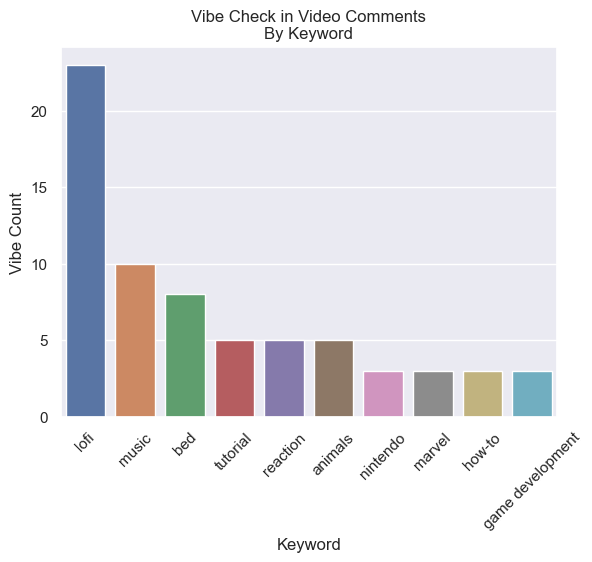

In [123]:
vibes = pd.read_sql('''SELECT vs.Keyword, COUNT(cm.Comment) as VibeCheck
                        FROM comments cm 
                            INNER JOIN videostats vs
                            ON cm.VideoID = vs.VideoID
                        WHERE cm.comment LIKE '%vibe%'
                        GROUP BY vs.Keyword
                        ORDER BY VibeCheck DESC
                        LIMIT 10
                        ''', con)

sns.set_style('darkgrid')
sns.barplot(data=vibes, x="Keyword", y="VibeCheck")
plt.xticks(rotation=45)
plt.xlabel('Keyword')
plt.ylabel('Vibe Count')
plt.title('Vibe Check in Video Comments\nBy Keyword')
plt.show()